# –ü–†–ò–ú–ï–ù–ï–ù–ò–ï –ê–õ–ì–û–†–ò–¢–ú–û–í –ú–ê–®–ò–ù–ù–û–ì–û –ò –ì–õ–£–ë–û–ö–û–ì–û –û–ë–£–ß–ï–ù–ò–Ø –î–õ–Ø –ò–ù–î–ï–ù–¢–ò–§–ò–ö–ê–¶–ò–ò –°–û–û–ë–©–ï–ù–ò–ô –ü–û–¢–ï–ù–¶–ò–ê–õ–¨–ù–´–• –°–£–ò–¶–ò–î–ï–ù–¢–û–í


---






*–ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from deeppavlov import build_model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö



*–ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–æ–≤ –∏–∑ —Ñ–æ—Ä–º–∞—Ç–∞ JSON*

In [ ]:
data = pd.read_json("RU_dataset_sucides.json")
data.columns = ["Text", "Label"]
data

Text        Label
0      –ë—ã–≤—à–∞—è –∂–µ–Ω–∞ —É–≥—Ä–æ–∂–∞–µ—Ç —Å–∞–º–æ—É–±–∏–π—Å—Ç–≤–æ–º –ù–µ–¥–∞–≤–Ω–æ —è –Ω...      suicide
1      –Ø —Å—Ç—Ä–∞–Ω–Ω—ã–π? –ù–∞ –º–µ–Ω—è –Ω–µ –≤–ª–∏—è—é—Ç –∫–æ–º–ø–ª–∏–º–µ–Ω—Ç—ã, –µ—Å–ª...  non-suicide
2      –ù–∞–∫–æ–Ω–µ—Ü-—Ç–æ 2020 –≥–æ–¥ –ø–æ—á—Ç–∏ –∑–∞–∫–æ–Ω—á–∏–ª—Å—è... –¢–∞–∫ —á—Ç...  non-suicide
3       –º–Ω–µ –Ω—É–∂–Ω–∞ –ø–æ–º–æ—â—å, –ø—Ä–æ—Å—Ç–æ –ø–æ–º–æ–≥–∏ –º–Ω–µ, —è —Ç–∞–∫ –ø–ª–∞—á—É      suicide
4      –Ø —Ç–∞–∫ —Ä–∞—Å—Ç–µ—Ä—è–Ω–∞. –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –º–µ–Ω—è –∑–æ–≤—É—Ç –ê–¥–∞–º...      suicide
...                                                  ...          ...
47992  –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ —É–≤–∏–¥–µ–ª –∑–∞–±–∞–≤–Ω—ã–π –º–µ–º, –ø—Ä–µ–∂–¥–µ —á–µ–º –ø...      suicide
47993  –Ø –±–æ—é—Å—å, –º–Ω–µ –Ω–µ–∫–æ–º—É —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å. –£ –º–µ–Ω—è –∏–Ω—Ñ–µ–∫—Ü–∏...  non-suicide
47994  –ü–µ–¥–æ—Ñ–∏–ª–∏—è, —á–ª–µ–Ω–æ–≤—Ä–µ–¥–∏—Ç–µ–ª—å—Å—Ç–≤–æ –∏ –º—ã—Å–ª–∏ –æ —Å–∞–º–æ—É–±...      suicide
47995  –Ø –±–æ–ª—å—à–µ –Ω–µ –º–æ–≥—É —Å–ø—Ä–∞–≤–ª—è—Ç—å—Å—è. –ü–æ—á—Ç–∏ 2 –º–µ—Å—è—Ü–∞ –Ω...      suicide
47996  –ú–Ω–µ –Ω—É–∂–µ–Ω –∫—Ç–æ-—Ç–æ, –∫—Ç–æ —Å–¥–µ–ª–∞–µ—Ç —Å—é—Ä–ø—Ä–∏–∑ –º–æ–µ–º—É –¥–≤...  non-suicide

[47997 rows x 2 columns]

*–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47997 entries, 0 to 47996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    47997 non-null  object
 1   Label   47997 non-null  object
dtypes: object(2)
memory usage: 750.1+ KB


# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∫–ª–∞—Å—Å–æ–≤

*–ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏*

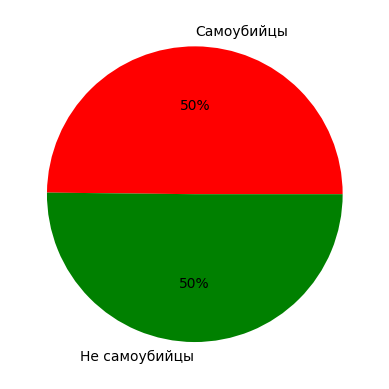

In [ ]:
plt.pie([sum(data['Label'] == "suicide"), sum(data['Label'] == "non-suicide")],
        labels = ["–°–∞–º–æ—É–±–∏–π—Ü—ã", "–ù–µ —Å–∞–º–æ—É–±–∏–π—Ü—ã"],
        colors = ["red", "green"],
        autopct='%.f%%')
plt.show()

*–°–æ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏*

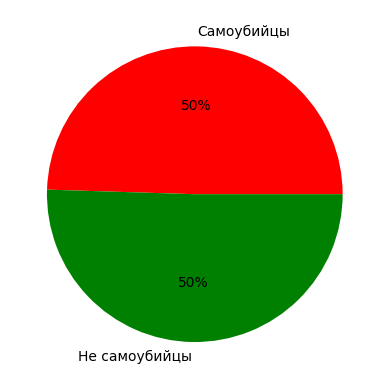

In [ ]:
data = data[:15000]
plt.pie([sum(data['Label'] == "suicide"), sum(data['Label'] == "non-suicide")],
        labels = ["–°–∞–º–æ—É–±–∏–π—Ü—ã", "–ù–µ —Å–∞–º–æ—É–±–∏–π—Ü—ã"],
        colors = ["red", "green"],
        autopct='%.f%%')
plt.show()

–ò—Å—Ö–æ–¥–Ω—ã–π –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ —É–¥–∞–ª–æ—Å—å —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

*–ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤*

In [ ]:
data['binary label'] = data['Label'].replace({
    "suicide": 1,
    "non-suicide": 0
})

<ipython-input-5-d46ba60b823a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binary label'] = data['Label'].replace({


*–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö*

In [ ]:
segmenter = Segmenter()
moprh_vocab = MorphVocab()
emb = NewsEmbedding()
nmt = NewsMorphTagger(emb)
russian_stopwords = stopwords.words('russian')

def preprocess_text(text):
  text = re.sub('[^–∞-—è–ê-–Ø—ë–Å ]', ' ', text.lower())
  doc = Doc(text)
  doc.segment(segmenter)
  doc.tag_morph(nmt)
  for token in doc.tokens:
    token.lemmatize(moprh_vocab)
  tokens_clear = [token.lemma for token in doc.tokens if token.lemma not in russian_stopwords]
  return ' '.join(tokens_clear)

*–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö*

In [ ]:
data['Clear text'] = data['Text'].apply(preprocess_text)

<ipython-input-7-f9b262b68a38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clear text'] = data['Text'].apply(preprocess_text)


*–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—É—Å—Ç—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏–π*

In [ ]:
data["length"] = data["Clear text"].apply(lambda x: len(x.split()))
print(data['length'].min())
print(data['length'].max())

0
1482


<ipython-input-8-20b8c46db921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["length"] = data["Clear text"].apply(lambda x: len(x.split()))


–£–¥–∞–ª–∏–º –∏—Ö

In [ ]:
data = data[data["length"] > 0]

*–î–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤*

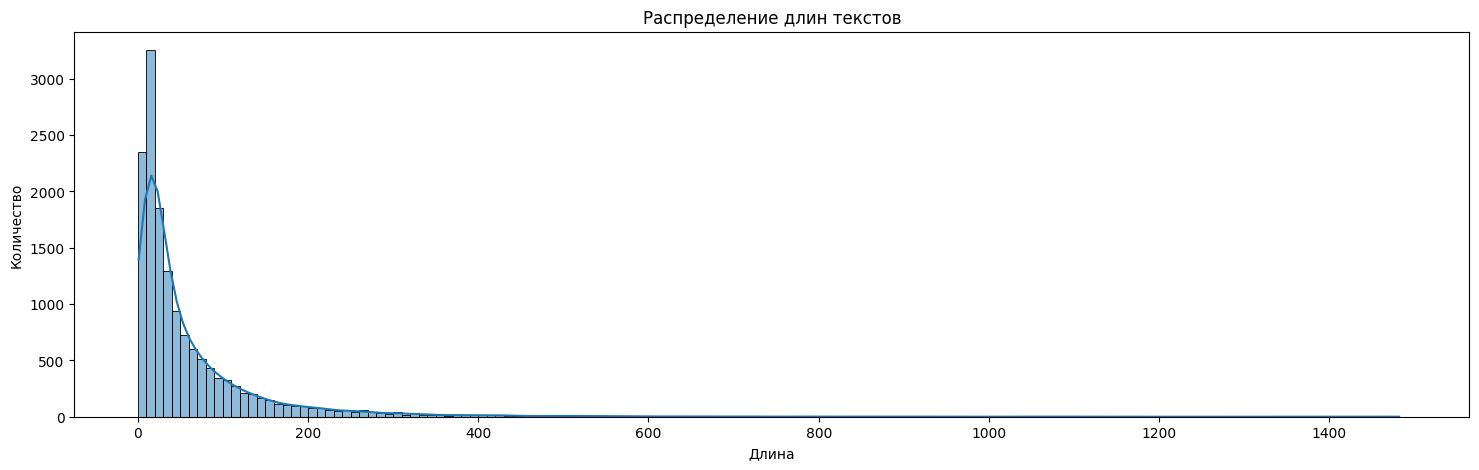

In [ ]:
plt.figure(figsize=(18, 5))
sns.histplot(data['length'], bins=np.arange(0, 1500, 10), kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω —Ç–µ–∫—Å—Ç–æ–≤')
plt.xlabel('–î–ª–∏–Ω–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

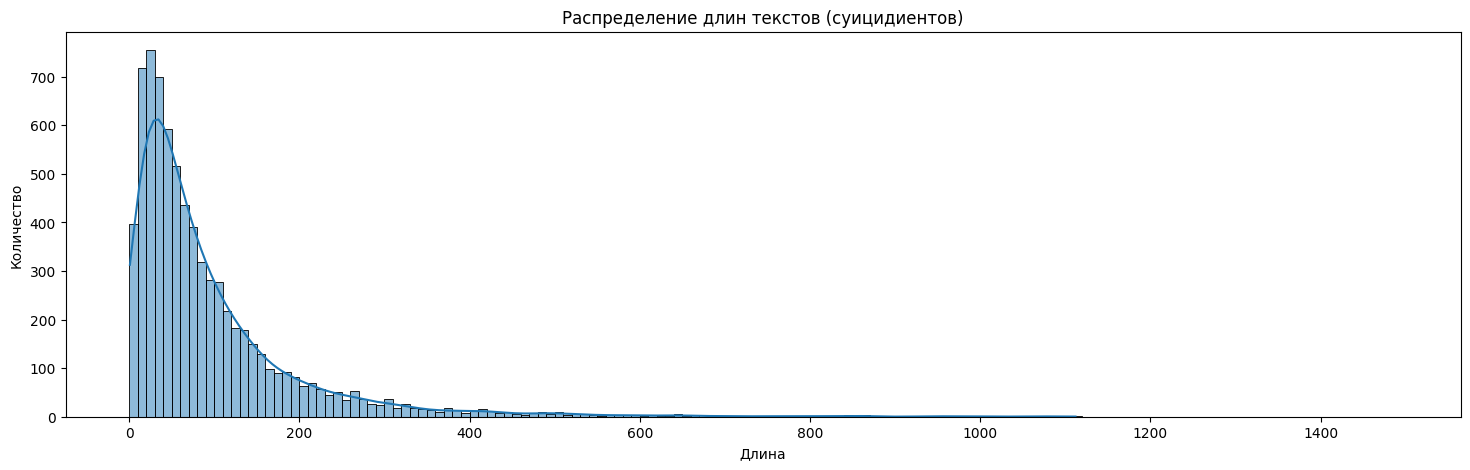

In [ ]:
plt.figure(figsize=(18, 5))
sns.histplot(data[data['binary label']==1]['length'], bins=np.arange(0, 1500, 10), kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω —Ç–µ–∫—Å—Ç–æ–≤ (—Å—É–∏—Ü–∏–¥–∏–µ–Ω—Ç–æ–≤)')
plt.xlabel('–î–ª–∏–Ω–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

In [ ]:
data.groupby('Label').agg({
    'length' : ["min", "max", "median", "mean"]
})

length                        
               min   max median       mean
Label                                     
non-suicide      1  1482   16.0  29.225781
suicide          1  1112   60.0  94.784454

# –°–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑

*–ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –¥–ª—è —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –º–µ—Ç–∫–∏ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏—è —Ç–µ–∫—Å—Ç—É*

In [ ]:
sentiment_analyzer = build_model('rusentiment_bert', download=True, install=True)

2024-05-25 12:01:43.496 INFO in 'deeppavlov.core.data.utils'['utils'] at line 97: Downloading from http://files.deeppavlov.ai/v1/classifiers/rusentiment_bert/rusentiment_bert_torch.tar.gz to /root/.deeppavlov/models/classifiers/rusentiment_bert_torch.tar.gz
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/v1/classifiers/rusentiment_bert/rusentiment_bert_torch.tar.gz to /root/.deeppavlov/models/classifiers/rusentiment_bert_torch.tar.gz
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.34G/1.34G [00:41<00:00, 32.5MB/s]
2024-05-25 12:02:25.592 INFO in 'deeppavlov.core.data.utils'['utils'] at line 284: Extracting /root/.deeppavlov/models/classifiers/rusentiment_bert_torch.tar.gz archive into /root/.deeppavlov/models/classifiers/rusentiment_bert_torch
INFO:deeppavlov.core.data.utils:Extracting /root/.deeppavlov/models/classifiers/rusentiment_bert_torch.tar.gz archive into /root/.deeppavlov/models/classifiers/rusentiment_bert_torch
/usr/local/lib/python3.10/dist-packages/hugg

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual

*–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏*

In [ ]:
data['sentiment'] = data['Text'].apply(lambda x: sentiment_analyzer([x])[0])

In [ ]:
data

Text        Label  \
0      –ë—ã–≤—à–∞—è –∂–µ–Ω–∞ —É–≥—Ä–æ–∂–∞–µ—Ç —Å–∞–º–æ—É–±–∏–π—Å—Ç–≤–æ–º –ù–µ–¥–∞–≤–Ω–æ —è –Ω...      suicide   
1      –Ø —Å—Ç—Ä–∞–Ω–Ω—ã–π? –ù–∞ –º–µ–Ω—è –Ω–µ –≤–ª–∏—è—é—Ç –∫–æ–º–ø–ª–∏–º–µ–Ω—Ç—ã, –µ—Å–ª...  non-suicide   
2      –ù–∞–∫–æ–Ω–µ—Ü-—Ç–æ 2020 –≥–æ–¥ –ø–æ—á—Ç–∏ –∑–∞–∫–æ–Ω—á–∏–ª—Å—è... –¢–∞–∫ —á—Ç...  non-suicide   
3       –º–Ω–µ –Ω—É–∂–Ω–∞ –ø–æ–º–æ—â—å, –ø—Ä–æ—Å—Ç–æ –ø–æ–º–æ–≥–∏ –º–Ω–µ, —è —Ç–∞–∫ –ø–ª–∞—á—É      suicide   
4      –Ø —Ç–∞–∫ —Ä–∞—Å—Ç–µ—Ä—è–Ω–∞. –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –º–µ–Ω—è –∑–æ–≤—É—Ç –ê–¥–∞–º...      suicide   
...                                                  ...          ...   
14995  —É –º–µ–Ω—è 38666 –∫–∞—Ä–º—ã :D —è –ø–æ —Å—É—Ç–∏ —Å–∞—Ç–∞–Ω–∞ üòàüòàüòà\n\n...  non-suicide   
14996  16F –∫—Ç–æ-–Ω–∏–±—É–¥—å —Ö–æ—á–µ—Ç –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å, –º–Ω–µ —á–µ—Ä—Ç–æ–≤—Å–∫–∏...  non-suicide   
14997  –ß—Ç–æ –º–Ω–µ —Ç–µ–ø–µ—Ä—å –¥–µ–ª–∞—Ç—å? –Ø –Ω–∞–∫–æ–Ω–µ—Ü-—Ç–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª...      suicide   
14998  —ç—Ç–æ –≤—Å–µ, —á—Ç–æ —Ç—ã –ø–∏—à–µ—à—å, —á–µ—Ä—Ç –≤–æ–∑—å–º–∏. –∏–¥–∏ –∏ —Å–¥–µ...  non-suicide   
14999  –ï—Å—Ç—å –ø–ª—é—Å—ã –≤ —Ç–æ–º, —á—Ç–æ —Ç–≤–æ—è –º–∞–º–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ Mon...  non-suicide   

       binary label                                         Clear text  \
0                 1  –±—ã–≤—à–∏–π –∂–µ–Ω–∞ —É–≥—Ä–æ–∂–∞—Ç—å —Å–∞–º–æ—É–±–∏–π—Å—Ç–≤–æ –Ω–µ–¥–∞–≤–Ω–æ –Ω–∞–≤—Å...   
1                 0  —Å—Ç—Ä–∞–Ω–Ω—ã–π –≤–ª–∏—è—Ç—å –∫–æ–º–ø–ª–∏–º–µ–Ω—Ç –∏—Å—Ö–æ–¥–∏—Ç—å –∑–Ω–∞—Ç—å –æ—á–µ–Ω...   
2                 0  –≥–æ–¥ –∑–∞–∫–æ–Ω—á–∏—Ç—å—Å—è –±–æ–ª—å—à–æ–π —É—Å–ª—ã—à–∞—Ç—å –≥–æ–¥ –ø–ª–æ—Ö–æ–π –∫–ª...   
3                 1                –Ω—É–∂–Ω—ã–π –ø–æ–º–æ—â—å –ø—Ä–æ—Å—Ç–æ –ø–æ–º–æ—á—å –ø–ª–∞–∫–∞—Ç—å   
4                 1  —Ä–∞—Å—Ç–µ—Ä—è—Ç—å –∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å –∑–≤–∞—Ç—å –∞–¥–∞–º –≥–æ–¥ —Å—Ç—Ä–∞–¥–∞—Ç...   
...             ...                                                ...   
14995             0                                  –∫–∞—Ä–º–∞ —Å—É—Ç—å —Å–∞—Ç–∞–Ω–∞   
14996             0  —Ö–æ—Ç–µ—Ç—å –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å —á–µ—Ä—Ç–æ–≤—Å–∫–∏ —Å–∫—É—á–Ω—ã–π —ç—Ç–æ –Ω–∞–ø–æ–ª–Ω...   
14997             1  –¥–µ–ª–∞—Ç—å –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å –¥—É–º–∞—Ç—å —Å–∞–º–æ—É–±–∏–π...   
14998             0  —ç—Ç–æ –≤–µ—Å—å –ø–∏—Å–∞—Ç—å —á–µ—Ä—Ç –≤–∑—è—Ç—å –∏–¥—Ç–∏ —Å–¥–µ–ª–∞—Ç—å —Å–≤–æ–π —É...   
14999             0  –ø–ª—é—Å —Ç–≤–æ–π –º–∞–º–∞ —Ä–∞–±–æ—Ç–∞—Ç—å –º–æ—á—å –æ—Ö—Ä–∞–Ω—è—Ç—å –≤–µ—Å—å –∑–∞–≤...   

       length sentiment  
0          65  negative  
1          11  positive  
2          11  negative  
3           5  negative  
4         223  negative  
...       ...       ...  
14995       3      skip  
14996      13   neutral  
14997      52  negative  
14998      26   neutral  
14999      20   neutral  

[14979 rows x 6 columns]

*–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤*

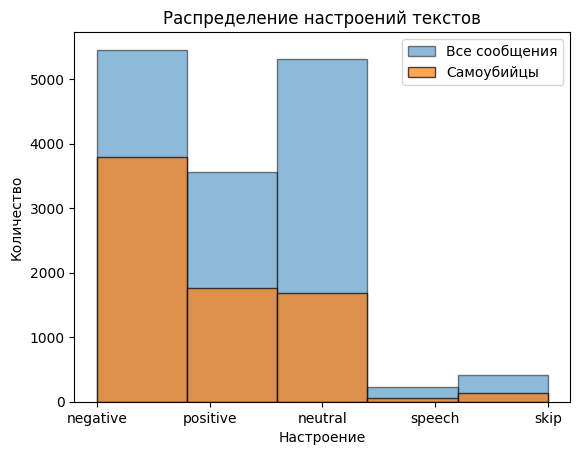

In [ ]:
plt.hist(data['sentiment'], bins=5,edgecolor='black', alpha=0.5, label="–í—Å–µ —Å–æ–æ–±—â–µ–Ω–∏—è")
plt.hist(data[data['binary label']==1]['sentiment'], bins=5,edgecolor='black', alpha=0.7, label="–°–∞–º–æ—É–±–∏–π—Ü—ã")
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–π —Ç–µ–∫—Å—Ç–æ–≤')
plt.xlabel('–ù–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.legend()
plt.show()

*–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –∏ –∫–ª–∞—Å—Å–æ–º*

–ì–∏–ø–æ—Ç–µ–∑—ã:


*   H0 - –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã (–Ω–µ—Ç –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å—É–∏—Ü–∏–¥–∞–ª—å–Ω—ã—Ö –º—ã—Å–ª–µ–π)
*   H1 - –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ —è–≤–∞–ª—è—é—Ç—Å—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ (—Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å—É–∏—Ü–∏–¥–∞–ª—å–Ω—ã—Ö –º—ã—Å–ª–µ–π)



In [ ]:
table = pd.crosstab(data['sentiment'], data['Label'])
—Åhi2, p, dof, freq = chi2_contingency(table)

In [ ]:
—Åhi2, p

(1635.9090669761335, 0.0)

**p-value –º–µ–Ω—å—à–µ 0.05, –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è**

In [ ]:
table

Label      non-suicide  suicide
sentiment                      
negative          1669     3788
neutral           3628     1678
positive          1811     1757
skip               283      138
speech             165       62

In [ ]:
pd.DataFrame(freq, index=table.index, columns=table.columns)

Label      non-suicide      suicide
sentiment                          
negative   2752.726617  2704.273383
neutral    2676.556245  2629.443755
positive   1799.840310  1768.159690
skip        212.369050   208.630950
speech      114.507778   112.492222

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤

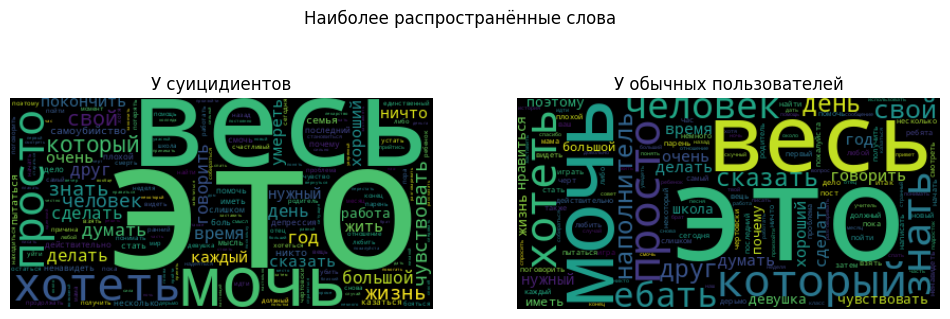

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
wc = WordCloud(collocations=False).generate(' '.join(data[data['binary label'] == 1]['Clear text'].astype(str)))
ax[0].imshow(wc, interpolation='bilinear')
ax[0].set_title('–£ —Å—É–∏—Ü–∏–¥–∏–µ–Ω—Ç–æ–≤')
ax[0].axis('off')
wc2 = WordCloud(collocations=False).generate(' '.join(data[data['binary label'] == 0]['Clear text'].astype(str)))
ax[1].imshow(wc2, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('–£ –æ–±—ã—á–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
fig.suptitle("–ù–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–µ —Å–ª–æ–≤–∞")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

*–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data['Clear text'],
    data['binary label'],
    test_size=0.2,
    stratify = data['binary label']
)

–í –∫–∞—á–µ—Å—Ç–≤–µ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã:


1.   –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
2.   SVM (–ª–∏–Ω–µ–π–Ω–æ–µ —è–¥—Ä–æ)
3.   –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä

–î–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–µ—Ä–µ–∫—Ä—ë—Å—Ç–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–∞ –ø—è—Ç—å —Ñ–æ–ª–¥–æ–≤



*–°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–Ω–≤–µ–π–µ—Ä–∞*

In [ ]:
pipe = Pipeline([
    ('preprocessing', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

*–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞*

In [ ]:
param_grid = [
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]},
    {'classifier': [MultinomialNB()],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]},
    {'classifier':[SVC(kernel='linear')],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]}
]

*–ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏*

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000)],
                          'preprocessing': [TfidfVectorizer(),
                                            CountVectorizer()]},
                         {'classifier': [MultinomialNB()],
                          'preprocessing': [TfidfVectorizer(),
                                            CountVectorizer()]},
                         {'classifier': [SVC(kernel='linear')],
                          'preprocessing': [TfidfVectorizer(),
                                            CountVectorizer()]}],
             scoring='accuracy')

In [ ]:
grid.best_estimator_

Pipeline(steps=[('preprocessing', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
grid.best_score_

0.9172993091670654

In [ ]:
results = {"models": [grid.best_estimator_],
           "scores": [grid.best_score_]}

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∞–Ω—Å–∞–º–±–ª–µ–≤—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

*–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞*

In [ ]:
param_grid = [
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [50, 100, 150],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]},
    {'classifier': [AdaBoostClassifier()],
     'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]},
    {'classifier':[GradientBoostingClassifier()],
     'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
     'classifier__max_depth': [1, 2, 3],
     'preprocessing': [TfidfVectorizer(), CountVectorizer()]}
]

*–ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏*

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [50, 100, 150],
                          'preprocessing': [TfidfVectorizer(),
                                            CountVectorizer()]},
                         {'classifier': [AdaBoostClassifier()],
                          'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                          'preprocessing': [TfidfVectorizer(),
                                            CountVectorizer()]},
                         {'classifier': [GradientBoostingClassifier()],
                          'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                          'classifier__max_depth': [1, 2, 3],
                          'preprocessing': [TfidfVectorizer(),
          

In [ ]:
grid.best_estimator_

Pipeline(steps=[('preprocessing', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
grid.best_score_

0.8860884466740911

In [ ]:
results['models'].append(grid.best_estimator_)
results['scores'].append(grid.best_score_)

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π

*–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —Å–ª–æ–≤–∞—Ä—è*

In [ ]:
vocab_size = len(grid.best_estimator_.steps[0][1].vocabulary_)

*LSTM –º–æ–¥–µ–ª—å*

In [ ]:
def create_LSTM(maxlen):
    model = Sequential([
        Embedding(vocab_size, 100, input_length=maxlen),
        LSTM(100, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

*CNN –Æ–Ω–∞ –ö–∏–º–∞*

In [ ]:
def create_CNN(maxlen):
  CNN = Sequential([
    Embedding(vocab_size, 100, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
  ])
  CNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return CNN

*–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏*

In [ ]:
def model_fit(x, y, model_create, epochs=15):
  acc_per_lens = []
  loss_per_lens = []
  tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
  tokenizer.fit_on_texts(x)
  for l in [30, 60, 95]:
    print("===================================================================")
    print(f"–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:{l}")
    print("===================================================================")
    kf = KFold(5, shuffle=True)
    acc_per_fold = []
    loss_per_fold = []
    for train_index, val_index in kf.split(x):
      print(f'–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: {len(acc_per_fold)+1}')
      print('-----------------------------------------------------------------')
      x_train, x_val = x.iloc[train_index], x.iloc[val_index]
      y_train, y_val = y.iloc[train_index], y.iloc[val_index]
      x_train = tokenizer.texts_to_sequences(x_train)
      x_val = tokenizer.texts_to_sequences(x_val)
      x_train = pad_sequences(x_train, maxlen=l, padding='post', truncating='post')
      x_val = pad_sequences(x_val, maxlen=l, padding='post', truncating='post')
      model = model_create(l)
      history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
      acc_per_fold.append(history.history['val_accuracy'])
      loss_per_fold.append(history.history['val_loss'])
    acc_per_lens.append(np.mean(acc_per_fold, axis=0))
    loss_per_lens.append(np.mean(loss_per_fold, axis=0))
  return acc_per_lens, loss_per_lens

*–ü—Ä–æ–≤–µ—Ä–∫–∞ GPU*

In [ ]:
gpus = tf.config.list_physical_devices('GPU')

In [ ]:
if gpus:
  print("–ï—Å—Ç—å GPU")
else:
  print("–ù–µ—Ç GPU")

–ï—Å—Ç—å GPU


*–û–±—É—á–µ–Ω–∏–µ LSTM*

In [ ]:
LSTM_acc, LSTM_loss = model_fit(x_train, y_train, create_LSTM)

–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:30
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 1
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 2
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 3
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 4
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 5
-----------------------------------------------------------------
–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:60
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 1
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 2
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 3
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª

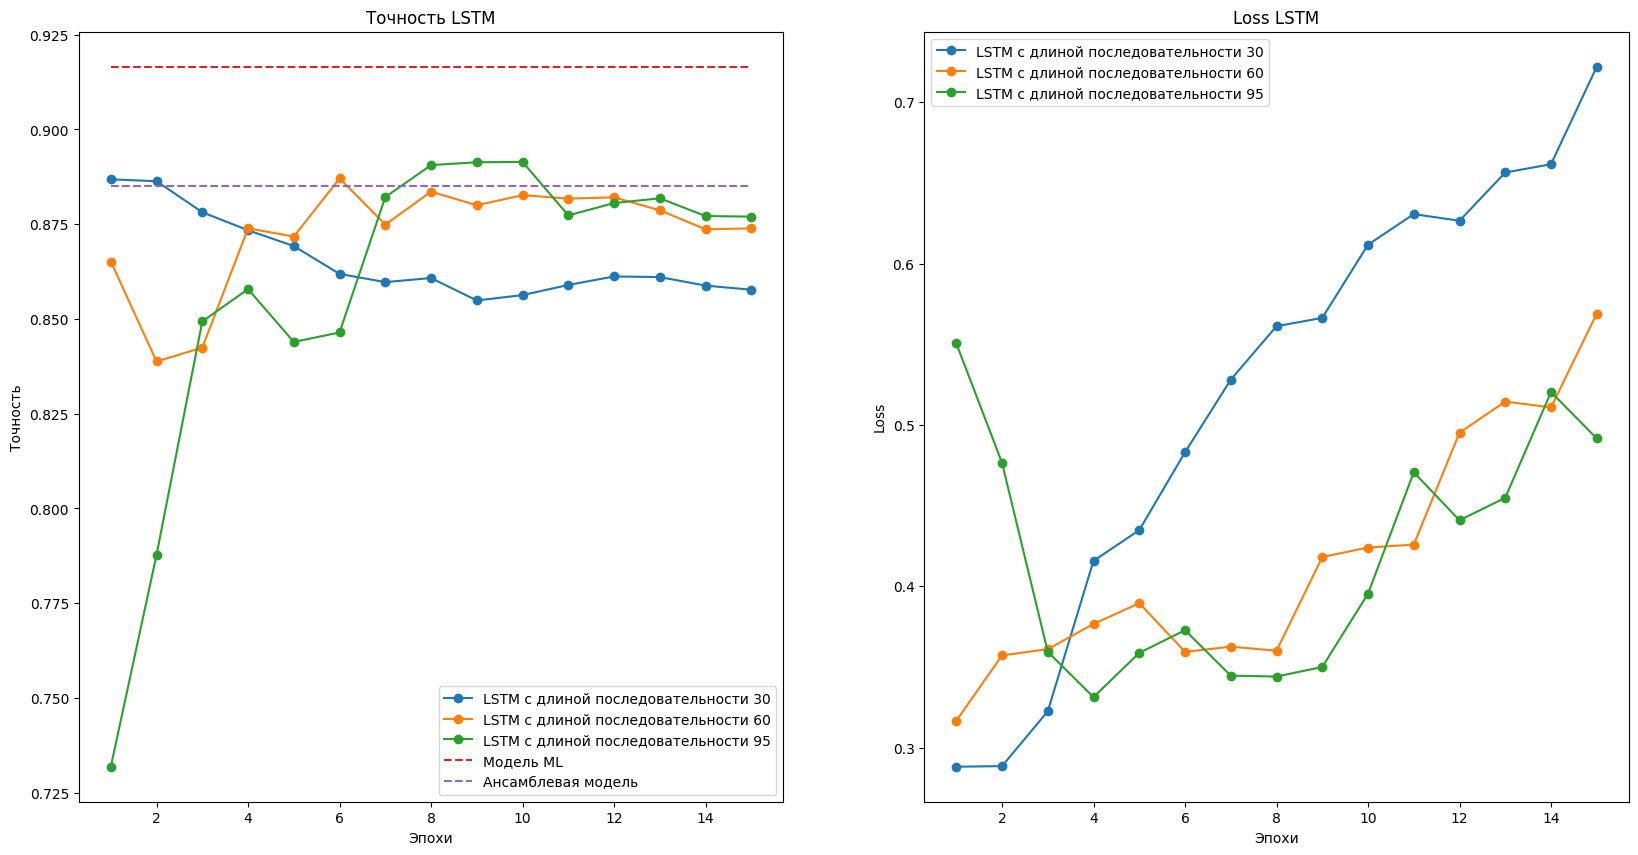

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(np.arange(1, 16), LSTM_acc[0], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 30", marker='o')
ax[0].plot(np.arange(1, 16), LSTM_acc[1], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 60", marker='o')
ax[0].plot(np.arange(1, 16), LSTM_acc[2], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 95", marker='o')
ax[0].plot(np.arange(1, 16),[results['scores'][0]]*15, label = "–ú–æ–¥–µ–ª—å ML", linestyle='--')
ax[0].plot(np.arange(1, 16),[results['scores'][1]]*15, label = "–ê–Ω—Å–∞–º–±–ª–µ–≤–∞—è –º–æ–¥–µ–ª—å", linestyle='--')
ax[0].set_title('–¢–æ—á–Ω–æ—Å—Ç—å LSTM')
ax[0].set_xlabel('–≠–ø–æ—Ö–∏')
ax[0].set_ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
ax[0].legend()
ax[1].plot(np.arange(1, 16), LSTM_loss[0], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 30", marker='o')
ax[1].plot(np.arange(1, 16), LSTM_loss[1], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 60", marker='o')
ax[1].plot(np.arange(1, 16), LSTM_loss[2], label="LSTM —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 95", marker='o')
ax[1].set_title('Loss LSTM')
ax[1].set_xlabel('–≠–ø–æ—Ö–∏')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()

*–û–±—É—á–µ–Ω–∏–µ CNN*

In [ ]:
CNN_acc, CNN_loss = model_fit(x_train, y_train, create_CNN)

–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:30
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 1
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 2
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 3
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 4
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 5
-----------------------------------------------------------------
–î–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:60
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 1
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 2
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞: 3
-----------------------------------------------------------------
–ù–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª

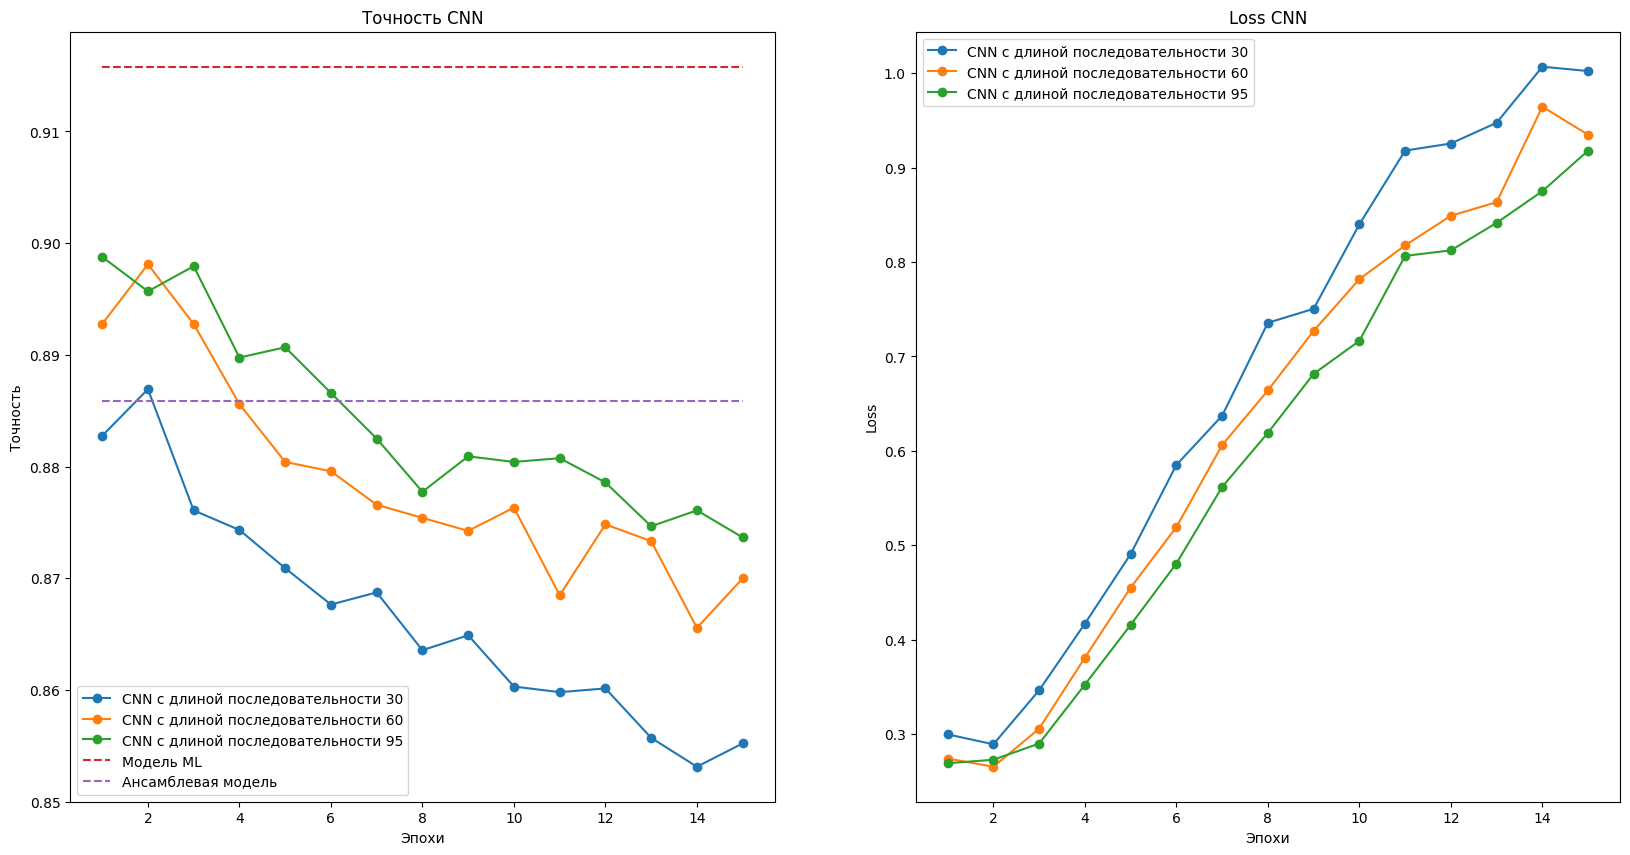

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(np.arange(1, 16), CNN_acc[0], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 30", marker='o')
ax[0].plot(np.arange(1, 16), CNN_acc[1], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 60", marker='o')
ax[0].plot(np.arange(1, 16), CNN_acc[2], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 95", marker='o')
ax[0].plot(np.arange(1, 16),[results['scores'][0]]*15, label = "–ú–æ–¥–µ–ª—å ML", linestyle='--')
ax[0].plot(np.arange(1, 16),[results['scores'][1]]*15, label = "–ê–Ω—Å–∞–º–±–ª–µ–≤–∞—è –º–æ–¥–µ–ª—å", linestyle='--')
ax[0].set_title('–¢–æ—á–Ω–æ—Å—Ç—å CNN')
ax[0].set_xlabel('–≠–ø–æ—Ö–∏')
ax[0].set_ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
ax[0].legend()
ax[1].plot(np.arange(1, 16), CNN_loss[0], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 30", marker='o')
ax[1].plot(np.arange(1, 16), CNN_loss[1], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 60", marker='o')
ax[1].plot(np.arange(1, 16), CNN_loss[2], label="CNN —Å –¥–ª–∏–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 95", marker='o')
ax[1].set_title('Loss CNN')
ax[1].set_xlabel('–≠–ø–æ—Ö–∏')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

*–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏*

In [ ]:
start_time = time.time()
preds1 = results['models'][0].predict(x_test)
end_time = time.time()
ML_time = end_time-start_time
acc1 = accuracy_score(y_test, preds1)

*–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–≤–æ–π –º–æ–¥–µ–ª–∏*

In [ ]:
start_time = time.time()
preds2 = results['models'][1].predict(x_test)
end_time = time.time()
ensemble_time = end_time-start_time
acc2 = accuracy_score(y_test, preds2)

–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ LSTM

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
x_train_token = tokenizer.texts_to_sequences(x_train)
x_test_token = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train_LSTM = pad_sequences(x_train_token, maxlen=30, padding='post', truncating='post')
x_test_LSTM = pad_sequences(x_test_token, maxlen=30, padding='post', truncating='post')

In [ ]:
LSTM_model = create_LSTM(30)
LSTM_model.fit(x_train_LSTM, y_train, epochs=2)

Epoch 1/2
375/375 [==============================] - 42s 89ms/step - loss: 0.3460 - accuracy: 0.8611
Epoch 2/2
375/375 [==============================] - 33s 88ms/step - loss: 0.1781 - accuracy: 0.9362


In [ ]:
start_time = time.time()
LSTM_acc = LSTM_model.evaluate(x_test_LSTM, y_test)[1]
end_time = time.time()
LSTM_time = end_time - start_time

94/94 [==============================] - 2s 21ms/step - loss: 0.2935 - accuracy: 0.8772


–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ CNN

In [ ]:
x_train_CNN = pad_sequences(x_train_token, maxlen=95, padding='post', truncating='post')
x_test_CNN = pad_sequences(x_test_token, maxlen=95, padding='post', truncating='post')

In [ ]:
CNN_model = create_CNN(95)
CNN_model.fit(x_train_CNN, y_train, epochs=3)

Epoch 1/3
375/375 [==============================] - 24s 61ms/step - loss: 0.3790 - accuracy: 0.8469
Epoch 2/3
375/375 [==============================] - 24s 65ms/step - loss: 0.2029 - accuracy: 0.9330
Epoch 3/3
375/375 [==============================] - 23s 60ms/step - loss: 0.1152 - accuracy: 0.9655


In [ ]:
start_time = time.time()
CNN_acc = CNN_model.evaluate(x_test_CNN, y_test)[1]
end_time = time.time()
CNN_time = end_time-start_time

94/94 [==============================] - 1s 14ms/step - loss: 0.2853 - accuracy: 0.8935


# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

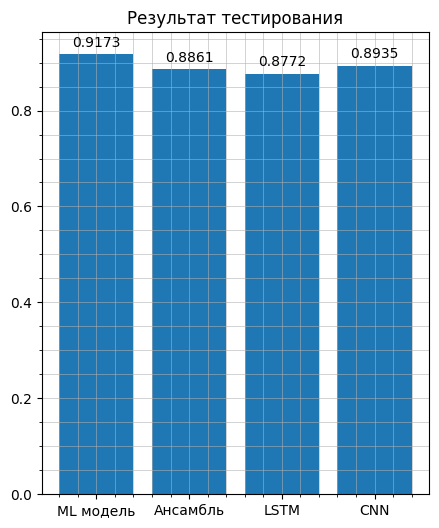

In [ ]:
labels = ['ML –º–æ–¥–µ–ª—å', '–ê–Ω—Å–∞–º–±–ª—å', 'LSTM', 'CNN']
scores = [results['scores'][0], results['scores'][1], LSTM_acc, CNN_acc]
plt.figure(figsize=(5, 6))
bars = plt.bar(labels, scores)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4),
             ha='center', va='bottom')
plt.title("–†–µ–∑—É–ª—å—Ç–∞—Ç —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è")
plt.grid(which="major", linewidth=0.4)
plt.grid(which="minor", linewidth=0.4)
plt.minorticks_on()
plt.show()

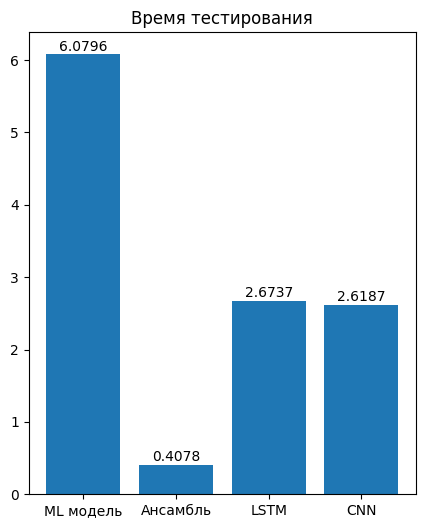

In [ ]:
plt.figure(figsize=(5, 6))
bars = plt.bar(labels, [ML_time, ensemble_time, LSTM_time, CNN_time])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4),
             ha='center', va='bottom')
plt.title("–í—Ä–µ–º—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è")
plt.show()